# Introduction to Pytorch
Lecturers = R. Patrick Xian, Santosh Adhikari, Sourin Dey<br>
Date = 07/2022

[Pytorch cheatsheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

### Use of Pytorch nowadays (2022):
- ### Research-grade deep learning model building
- ### High-performance computational tools that benefits from [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) / autodifferentiation, such as those that directly include or can be translated into optimization problems
- ### Probabilistic inference engine
- ### Prototyping machine-learning apps

In [23]:
import torch
import numpy as np

## 1. Data types
### 1.1 ```torch.tensor``` / ```torch.Tensor```

In [7]:
ts = torch.tensor([[1, 2], [3, 4]])
ts

tensor([[1, 2],
        [3, 4]])

In [12]:
torch.is_tensor(ts)

True

In [20]:
# shape is a property for tensor object
ts.shape

torch.Size([2, 2])

In [17]:
# numel (number of elements) is a method for tensor object, which is equivalent to the size of numpy array
ts.numel()

4

In [22]:
# Equivalent to above
torch.numel(ts)

4

In [8]:
type(ts)

torch.Tensor

In [38]:
# Create torch tensor from 
# Compa
torch.linspace(0, 4, 9)

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000])

In [37]:
np.linspace(0, 4, 9, endpoint=True)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

### 1.2 Interoperability with ```numpy```
Conversion from ```numpy.ndarray``` to ```torch.tensor```

In [29]:
np.random.seed(0)
arr = np.random.randn(3, 4)
arr

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351]])

In [31]:
tarr = torch.from_numpy(arr)
tarr

tensor([[ 1.7641,  0.4002,  0.9787,  2.2409],
        [ 1.8676, -0.9773,  0.9501, -0.1514],
        [-0.1032,  0.4106,  0.1440,  1.4543]], dtype=torch.float64)

Conversion from ```torch.tensor``` to ```numpy.ndarray```

In [40]:
ts_arr = ts.numpy()
ts_arr

array([[1, 2],
       [3, 4]], dtype=int64)

## 2. Building deep learning models
### 2.1 Neural network basics

A neural network is an overparametrized functional approximator. It is modeled loosely after neural networks in animal and human brains.

#### [Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) (Hornik 1991): A neural network with a hidden layer of infinite width can approximate any function.

Single layer neural network: $f_1 = g(w^Tx + b)$
<br>
N-layer neural network: $f_N = g(w_N^T(w_{N-1}^T(...(w_1^Tx + b_1) + b_{N-1}) + b_N)$
<img src="NN.png" alt="isolated" width="500"/>

In [53]:
import torch.nn as nn
import matplotlib.pyplot as plt

### 2.2 A neural network that simulates the XOR operation

- Why XOR? (XOR = exclusive or)<br>
XOR is the simplest nonlinear function with a vector input and scalar output.

| A | B | A XOR B |
|---|---|---------|
| 0 | 0 | 0       |
| 0 | 1 | 1       |
| 1 | 0 | 1       |
| 1 | 1 | 0       |

<br>
We need to use the neural network to represent $f$, such that $f \sim$ XOR

#### Generate training data

In [48]:
Xs = torch.tensor([[0., 0.],
                   [0., 1.],
                   [1., 0.],
                   [1., 1.]])

y = torch.tensor([0., 1., 1., 0.]).reshape(Xs.shape[0], 1)

#### Build neural network (XORNet)

In [ ]:
class XORNet(nn.Module):
    
    def __init__(self):
        super(XORNet, self).__init__()
        
        # Set the first linear layer
        self.linear1 = nn.Linear(2, 2)
        
        # Set the activation function
        self.Sigmoid = nn.Sigmoid()
        
        # Set the output layer
        self.linear2 = nn.Linear(2, 1)
    
    # Define forward pass through the neural network
    def forward(self, input):
        
        x = self.linear1(input)
        sig = self.Sigmoid(x)
        yh = self.linear2(sig)
        
        return yh

#### Initiate and summarize model

In [87]:
# Initiate neural network
xor_network = XORNet()

try:
    from torchsummary import summary
    summary(xor_network);
except:
    pass

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            6
├─Sigmoid: 1-2                           --
├─Linear: 1-3                            3
Total params: 9
Trainable params: 9
Non-trainable params: 0


#### Set network training parameters

In [109]:
# Set training epochs
epochs = 1000

# Define training loss function
mseloss = nn.MSELoss()

# Select optimizer
optimizer = torch.optim.Adam(xor_network.parameters(), lr = 0.03)

all_losses = [] 
current_loss = 0
sample_every = 50

#### Model training

In [110]:
for epoch in range(epochs): 
   
    # input training example and return the prediction   
    yhat = xor_network.forward(Xs)
    
    # calculate MSE loss   
    loss = mseloss(yhat, y)
      
    # backpropogate through the loss gradiants   
    loss.backward()
    
    # update model weights   
    optimizer.step()
    
    # remove current gradients for next iteration   
    optimizer.zero_grad() 
   
    # append to loss   
    current_loss += loss  
 
    if epoch % sample_every == 0:       
        all_losses.append(current_loss / plot_every)       
        current_loss = 0 
     
    # print progress
    if epoch % (sample_every*2) == 0:
        print(f'Epoch: {epoch} completed')

Epoch: 0 completed
Epoch: 100 completed
Epoch: 200 completed
Epoch: 300 completed
Epoch: 400 completed
Epoch: 500 completed
Epoch: 600 completed
Epoch: 700 completed
Epoch: 800 completed
Epoch: 900 completed


#### Plot loss function during the training of the neural network

Text(0.5, 0, 'Training epoch')

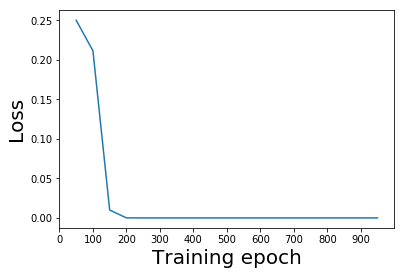

In [111]:
n_sampled = int(epochs / sample_every)
sampled_epochs = [i*sample_every for i in range(n_sampled)]
plt.plot(sampled_epochs[1:], all_losses[1:])
plt.ylabel('Loss', fontsize=20);
plt.xticks(range(0, epochs, 100))
plt.xlim([0, epochs])
plt.xlabel('Training epoch', fontsize=20)

In [112]:
for name, param in xor_network.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear1.weight tensor([[-2.6372, -2.6383],
        [-3.5483, -3.5519]])
linear1.bias tensor([3.4040, 0.8121])
linear2.weight tensor([[ 2.0913, -2.5266]])
linear2.bias tensor([-0.2742])


#### Test out the trained model

In [113]:
for input_vector in Xs:

    # Calculate prediction outcome
    out = xor_network(input_vector)
    invec = input_vector.detach().numpy()
    outval = out.round().detach().numpy()
    print('Input = {}, output = {}'.format(invec, outval))

Input = [0. 0.], output = [0.]
Input = [0. 1.], output = [1.]
Input = [1. 0.], output = [1.]
Input = [1. 1.], output = [0.]


## 3. Model storage and reuse
### 3.1 What constitutes a model and what needs to be stored?

- Weight matrices (w), biases (b), network architecture (hyper)parameters
- Optimization parameters
- Sampling parameters

In [119]:
xor_network.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-2.6372, -2.6383],
                      [-3.5483, -3.5519]])),
             ('linear1.bias', tensor([3.4040, 0.8121])),
             ('linear2.weight', tensor([[ 2.0913, -2.5266]])),
             ('linear2.bias', tensor([-0.2742]))])

### 3.2 Storing and loading model using Pytorch format
Pytorch file extension ```.pt``` or ```.pth```

In [116]:
torch.save(xor_network.state_dict(), r'.\xor_nn.pt')

In [118]:
# !ls

In [122]:
xor_nn_dict = torch.load(r'.\xor_nn.pt')

In [123]:
xor_nn = XORNet().load_state_dict(xor_nn_dict)

### 3.3 Storing model using [ONNX](https://onnx.ai/) (Open Neural Network Exchange) format
We use the [Pytorch specification of ONNX](https://pytorch.org/docs/master/onnx.html)

In [140]:
import torch.onnx as tonnx

In [141]:
tonnx.export(xor_network, Xs, r'.\xor_nn.onnx')

In [139]:
# !ls